# SVM

**SVM** (Support Vector Machine) to algorytm uczenia maszynowego, który służy do klasyfikacji (i regresji) danych. W skrócie, SVM znajduje linię lub hiperpłaszczyznę, która dzieli zbiór danych na grupy.

W najprostszym przypadku mamy do czynienia z dwiema grupami. Oczywiści może się zdarzyć, że istnieje więcej niż 1 hiperpłaszczyzna, która oddziela od siebie kalsy. Jak więc wybrać najlepszą?

Aby znaleźć tę hiperpłaszczyznę, SVM szuka **wektorów nośnych**, czyli próbek danych, które znajdują się najbliżej hiperpłaszczyzny. SVM szuka takiej hiperpłaszczyzny, która **maksymalizuje odległość pomiędzy wektorami nośnymi**, a tym samym zapewnia jak najlepsze rozdzielenie danych.

SVM może być wykorzystywany w różnych zastosowaniach, takich jak rozpoznawanie obrazów, klasyfikacja tekstu, diagnozowanie chorób i analiza finansowa.

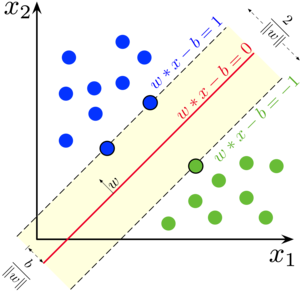

Wzór szukanej hiperpłaszczyzny to:

$$
wX + b = 0
$$

a wzory hiperpłaszczyzn przechodzących przez wektory nośne to:

$$
wX + b = 1 \\
wX + b = -1
$$

z czego łatwo policzyć długość **margin** (odległości między tymi dwona hiperpłaszczyznami):

$$
\frac{2}{||w||} \\
||w|| = \sqrt{w_1^2 + ... + w_n^2}
$$

Maksymalizacja powyższego wyrażenia jest równoważna minimalizacji:

$$
\frac{||w||^2}{2}
$$

przy warunku ograniczającym:

$$
y_i(wx_i+b) > 1 \\
i = 1,2,...,N
$$

Do znalezienia rozwiązania powyższego wykorzystywana jest metoda **mnożników Lagrange'a** oraz **ograniczenia Karush-Kuhn-Tucker** na mnożniki (zaawansowana optymalizacja).

$$
L(w, b, \alpha) = \frac{||w||^2}{2} - \sum_{i=1}^N \alpha_i(y_i(wx_i+b)-1)
$$

Rozwiązaniem dla $w$ jest:

$$
w = \sum_{i=1}^N \alpha_i y_ix_i
$$

a wartość $b$ wyliczamy z równania hiperpłaszczyzny:

$$
\sum_{i=1}^N \alpha_i y_ix_i X + b = 0
$$

Oczywiście może zdarzyc się, że dane nie są liniowo separowalne. W takim  wypadku do kazdego punktu "dodajemy" wartość $\zeta_i$, która odpowiada za "wielkość naruszenia marginseu". Wartości te chcamy także zminimalizować:

$$
\frac{||w||^2}{2} + C \sum_{i=1}^N \zeta_i
$$

Inną opcją jest transoformacja zmiennych do przestrzeni o większym wymiarze i znalezienie w niej separatora liniowego (równoznacznie szukamy nieliniowego separatowa w obecnej przestrzeni). Najczęściej stosuje się przekształcenia z użyciem **jądra** (kernel).

Najczęściej stosowane jądra w SVM to:

1. Jądro liniowe (linear kernel)

$K(x, x') = x^T x'$

2. Jądro wielomianowe (polynomial kernel)

$K(x, x') = (\gamma x^T x' + r)^d$

gdzie:

$\gamma$ to współczynnik skalowania,
$r$ to współczynnik przesunięcia,
$d$ to stopień wielomianu.

3. Jądro radialne (RBF kernel)

$K(x, x') = \exp(-\gamma ||x - x'||^2)$

gdzie:

$\gamma$ to współczynnik skalowania,
$||x - x'||^2$ to kwadrat odległości między wektorami cech $x$ i $x'$.

4. Jądro sigmoidalne (sigmoid kernel)

$K(x, x') = \tanh(\gamma x^T x' + r)$

gdzie:

$\gamma$ to współczynnik skalowania,
$r$ to współczynnik przesunięcia.

5. Jądro Laplace'a (Laplacian kernel)

$K(x, x') = \exp(-\gamma ||x - x'||_1)$

gdzie:

$\gamma$ to współczynnik skalowania,
$||x - x'||_1$ to odległość między wektorami cech $x$ i $x'$ mierzona w normie $L1$.

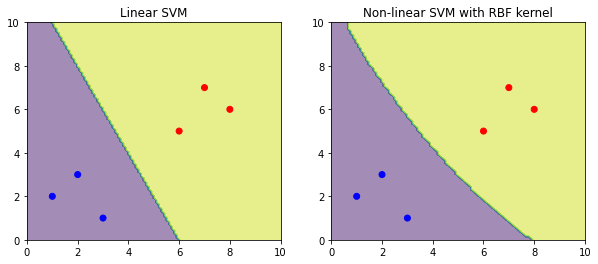

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# przykładowe dane 2D
X = np.array([[1, 2], [2, 3], [3, 1], [6, 5], [7, 7], [8, 6]])
y = np.array([0, 0, 0, 1, 1, 1])

# klasyfikacja liniowa
clf_linear = svm.SVC(kernel='linear')
clf_linear.fit(X, y)

# klasyfikacja nieliniowa z jądrem RBF
clf_rbf = svm.SVC(kernel='rbf')
clf_rbf.fit(X, y)

# generowanie siatki do wizualizacji granic decyzyjnych
xx, yy = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
Z_linear = clf_linear.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# wizualizacja granic decyzyjnych
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_linear, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Linear SVM')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_rbf, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Non-linear SVM with RBF kernel')

plt.show()

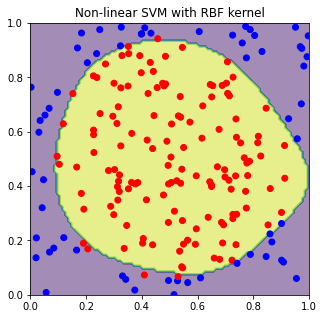

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# przykładowe dane nieseparowalne liniowo w kształcie koła
X = np.random.rand(200, 2)
y = np.zeros(len(X))
y[np.sum((X - 0.5) ** 2, axis=1) < 0.2] = 1

# klasyfikacja nieliniowa z jądrem RBF
clf_rbf = svm.SVC(kernel='rbf', gamma=10)
clf_rbf.fit(X, y)

# generowanie siatki do wizualizacji granic decyzyjnych
xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z_rbf = clf_rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# wizualizacja granic decyzyjnych
plt.figure(figsize=(5, 5))
plt.contourf(xx, yy, Z_rbf, alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title('Non-linear SVM with RBF kernel')

plt.show()